In [6]:
import cv2

In [11]:
from PIL import Image

In [14]:
import requests

In [57]:
from skimage.metrics import structural_similarity as ssim

In [77]:
import imutils

In [21]:
!mkdir card_tampering
!mkdir card_tampering\image

A subdirectory or file card_tampering already exists.


In [59]:
original  = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream = True).raw)

In [60]:
print('original image format: ' + original.format)
print('tampered image format: ' + tampered.format)

print('original image size: ',original.size)
print('tampered image size: ',tampered.size)

original image format: JPEG
tampered image format: PNG
original image size:  (1200, 800)
tampered image size:  (282, 179)


In [61]:
original = original.resize((250,160))
original.save('card_tampering/image/original.png')
tampered = tampered.resize((250,160))
tampered.save('card_tampering/image/tampered.png')

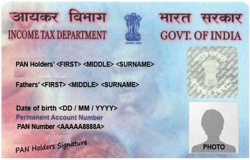

In [62]:
original

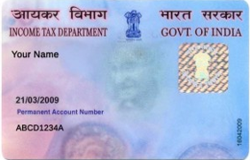

In [63]:
tampered

In [64]:
original = cv2.imread('card_tampering/image/original.png')
tampered = cv2.imread('card_tampering/image/tampered.png')

In [65]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [84]:
(score, diff) = ssim(original_gray, tampered_gray, full = True)
diff = (diff*255).astype('uint8')
print('structural similarity: ',score)

structural similarity:  0.31678790332739426


In [86]:
diff

array([[215, 208, 191, ...,  93,  89,  92],
       [214, 215, 204, ..., 122, 120, 112],
       [218, 221, 218, ..., 150, 148, 140],
       ...,
       [183, 199, 198, ..., 180, 183, 193],
       [173, 190, 178, ..., 156, 167, 183],
       [149, 179, 171, ..., 141, 150, 156]], dtype=uint8)

In [90]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

In [100]:
for c in contours:
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(tampered, (x,y), (x+w, y+h), (0,0,255), 2)

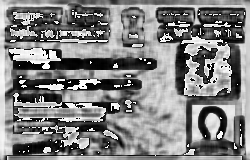

In [104]:
Image.fromarray(diff)

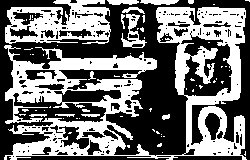

In [106]:
Image.fromarray(thresh)